# A Gentle Intro to `PyTorch` and tensors

By Dr. Jie Tao

ver.: 0.1

We have spent quite some time playing with `tensorflow`, however, another well-adopted package in terms of __deep learning__ is `PyTorch`, or just `torch` for short.

Traditionally, `tensorflow` and `torch` have some different use cases:
- `tf` is good for building your __own__ networks, particularly if the network topology (aka., architecture) is simple;
- `torch` is good when the architecture is not that simple, so it was popular with __transfer learning__ (will be covered in __Week 4__);
- `torch` also comes with good **operations** if you want to deal with tensors.

But nowadays they function almost the same, usually you use one if you are, or your group is, more familiar with it over the other. So it is crucial if you understand how `torch` works, which is the purpose of this workshop.

In [ ]:
import torch

We typically add a block at the top of the notebook when using `torch` to determine if we want to use __GPU__ or not.

In [ ]:
# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda") ## you can specify which GPU to use if you have more than one, for intance `cuda:0` is the first GPU

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4




---



## Tensors and Tensor Operations

Tensors are the basic unit in deep learning, which is the fundamental data structure in `torch`.

Tensors can be created from almost any collection objects in Python, for instance `lists` and `NumPy` arrays.

In [ ]:
my_lst = [1, 2, 3, 4, 5, 6] ## make sure the list only contains ONE data type
lst_tensor = torch.tensor(my_lst)
lst_tensor

tensor([1, 2, 3, 4, 5, 6])

Converting tensor back to list is not as straightforward, for instance, below code doesn't work as expected.

In [ ]:
list(lst_tensor)

[tensor(1), tensor(2), tensor(3), tensor(4), tensor(5), tensor(6)]

In [ ]:
## but this method works!!
lst_tensor.tolist()

[1, 2, 3, 4, 5, 6]

Arrays are more flexible.

In [ ]:
import numpy as np
from datetime import date

In [ ]:
# get current year
year = date.today().year

In [ ]:
np.random.seed(year) ## make sure the array is replicable
my_arr = np.random.rand(10, 10)
my_arr

array([[0.3219883 , 0.89042245, 0.58805226, 0.12659609, 0.14134122,
        0.46789559, 0.02208966, 0.72727471, 0.52438734, 0.54493524],
       [0.45637326, 0.50138226, 0.39446855, 0.1511723 , 0.36087518,
        0.16207701, 0.33795869, 0.18032328, 0.3909914 , 0.03564821],
       [0.56486165, 0.20346149, 0.32060446, 0.37656378, 0.18405414,
        0.10395184, 0.45492722, 0.19586384, 0.37852542, 0.93053196],
       [0.76015971, 0.77076424, 0.59670056, 0.79162115, 0.8103383 ,
        0.98055723, 0.88478525, 0.10980113, 0.81971076, 0.30761289],
       [0.26149467, 0.40572354, 0.55342038, 0.62552644, 0.07876025,
        0.97228343, 0.41131105, 0.7216644 , 0.66328748, 0.21822526],
       [0.18717254, 0.72977924, 0.86331326, 0.39172036, 0.11004811,
        0.9127915 , 0.35700599, 0.41296218, 0.18354969, 0.58599027],
       [0.85567085, 0.78968122, 0.08784242, 0.93299327, 0.49995114,
        0.36425699, 0.48360619, 0.51522459, 0.99464347, 0.75340344],
       [0.36581992, 0.61137308, 0.4196113

In [ ]:
my_arr.shape # (10, 10)

(10, 10)

In [ ]:
arr_tensor = torch.tensor(my_arr)
type(arr_tensor) # torch.Tensor

torch.Tensor

In [ ]:
arr_tensor.numpy() ### arr_tensor.detach().cpu().numpy()

array([[0.3219883 , 0.89042245, 0.58805226, 0.12659609, 0.14134122,
        0.46789559, 0.02208966, 0.72727471, 0.52438734, 0.54493524],
       [0.45637326, 0.50138226, 0.39446855, 0.1511723 , 0.36087518,
        0.16207701, 0.33795869, 0.18032328, 0.3909914 , 0.03564821],
       [0.56486165, 0.20346149, 0.32060446, 0.37656378, 0.18405414,
        0.10395184, 0.45492722, 0.19586384, 0.37852542, 0.93053196],
       [0.76015971, 0.77076424, 0.59670056, 0.79162115, 0.8103383 ,
        0.98055723, 0.88478525, 0.10980113, 0.81971076, 0.30761289],
       [0.26149467, 0.40572354, 0.55342038, 0.62552644, 0.07876025,
        0.97228343, 0.41131105, 0.7216644 , 0.66328748, 0.21822526],
       [0.18717254, 0.72977924, 0.86331326, 0.39172036, 0.11004811,
        0.9127915 , 0.35700599, 0.41296218, 0.18354969, 0.58599027],
       [0.85567085, 0.78968122, 0.08784242, 0.93299327, 0.49995114,
        0.36425699, 0.48360619, 0.51522459, 0.99464347, 0.75340344],
       [0.36581992, 0.61137308, 0.4196113

The first operation we often use is `mean`. Similar to `NumPy` we can get the mean along any dimensions.

Similarly you can do `max` or `min` or `std`.

In [ ]:
## mean of whole matrix
torch.mean(arr_tensor) # 0d-tensor, one scalar number

tensor(0.4814, dtype=torch.float64)

In [ ]:
## mean along dimension of 0 - rows
torch.mean(arr_tensor, dim=0)

tensor([0.4971, 0.6079, 0.4361, 0.4730, 0.3789, 0.4925, 0.4161, 0.4366, 0.5735,
        0.5020], dtype=torch.float64)

In [ ]:
## mean along dimension of 1 - cols
torch.mean(arr_tensor, dim=1)

tensor([0.4355, 0.2971, 0.3713, 0.6832, 0.4912, 0.4734, 0.6277, 0.4189, 0.4594,
        0.5558], dtype=torch.float64)

__PRO TIP__: why do we want to do these things in `torch` rather than `NumPy`? Since we can use the __GPU__. If your data is big then the calculation is day and night.

In [ ]:
# %%timeit
# for i in range(100):
#   embs = torch.tensor(np.random.rand(1000, 256, 768)).to(device) ## .to("cuda")/.to("cpu")
#   res = torch.mean(embs, dim=1)

In [ ]:
# %%timeit
# for i in range(100):
#   res = np.mean(np.random.rand(1000, 256, 768), axis=1)

Another operation we always use is `stack`. For instance, if you have a list of 1D tensors, you can stack them into a 2D tensor.

__Note__: `torch` requires the tensors to be stacked to have the same shape along the dimension to be stacked. Use the 1D tensor example, all tensors should have the same length (shape at dim `0`).

In [ ]:
# list(arr_tensor) makes a list of 10 1D tensors, each with the length of 10

torch.stack(list(arr_tensor)).shape # (10, 10)

torch.Size([10, 10])

Since they are 1D tensors, you can use the default `dim=0` argument with stack, if it's not the case, make sure you change it.

In [ ]:
torch.stack(list(arr_tensor), dim=1) ## is the transpose of the 2D tensor above

tensor([[0.3220, 0.4564, 0.5649, 0.7602, 0.2615, 0.1872, 0.8557, 0.3658, 0.8348,
         0.3622],
        [0.8904, 0.5014, 0.2035, 0.7708, 0.4057, 0.7298, 0.7897, 0.6114, 0.5496,
         0.6270],
        [0.5881, 0.3945, 0.3206, 0.5967, 0.5534, 0.8633, 0.0878, 0.4196, 0.0218,
         0.5149],
        [0.1266, 0.1512, 0.3766, 0.7916, 0.6255, 0.3917, 0.9330, 0.0917, 0.3471,
         0.8949],
        [0.1413, 0.3609, 0.1841, 0.8103, 0.0788, 0.1100, 0.5000, 0.5349, 0.5500,
         0.5187],
        [0.4679, 0.1621, 0.1040, 0.9806, 0.9723, 0.9128, 0.3643, 0.3408, 0.0132,
         0.6074],
        [0.0221, 0.3380, 0.4549, 0.8848, 0.4113, 0.3570, 0.4836, 0.0183, 0.7159,
         0.4748],
        [0.7273, 0.1803, 0.1959, 0.1098, 0.7217, 0.4130, 0.5152, 0.6035, 0.1898,
         0.7096],
        [0.5244, 0.3910, 0.3785, 0.8197, 0.6633, 0.1835, 0.9946, 0.9218, 0.7425,
         0.1152],
        [0.5449, 0.0356, 0.9305, 0.3076, 0.2182, 0.5860, 0.7534, 0.2814, 0.6294,
         0.7328]], dtype=tor

In [ ]:
torch.equal(torch.stack(list(arr_tensor)).T, torch.stack(list(arr_tensor), dim=1))

True

Another similar operation we use is `cat` (short for concatennate). If we concatenate a list of 10 1D tensors of length 10, we get a 1D tensor of (1,100).

In [ ]:
torch.cat(list(arr_tensor)).shape # 100, or (1,100) can also use arr_tensor.flatten()

torch.Size([100])

__Note__: make sure you know what shape you want your tensor in, before you choose between `stack` and `cat`.

### Exercise 1:

Complete the following tasks.

In [ ]:
my_2d_arrays = [torch.tensor(np.random.rand(3,2)) for i in range(3)]
len(my_2d_arrays), my_2d_arrays[0].shape # 3 and (3,2)

(3, torch.Size([3, 2]))

__TASK 1__: use proper operation to result a tensor with the shape of (9,2).

In [ ]:
torch.cat(my_2d_arrays).shape

torch.Size([9, 2])

__TASK 2__: use proper operation to result a tensor with the shape of (3,3,2).

In [ ]:
torch.stack(my_2d_arrays).shape

torch.Size([3, 3, 2])

__TASK 3__: calculate the means of each of the 3 original tensors, along the dimension of 1.

__HINT__: your result should have a shape of `(3,2)`.

__Challenge__: do it in one line.

In [ ]:
torch.stack([torch.mean(t, dim=0) for t in my_2d_arrays])

tensor([[0.8434, 0.4399],
        [0.5154, 0.4258],
        [0.5393, 0.6311]], dtype=torch.float64)

In [ ]:
torch.mean(torch.stack(my_2d_arrays), dim=1)

tensor([[0.8434, 0.4399],
        [0.5154, 0.4258],
        [0.5393, 0.6311]], dtype=torch.float64)

The next group of operations has to do with the shape of the tensors.

The first one is our old friend `.reshape()`, just make sure the new shape is compatible with the old one.

In [ ]:
arr_tensor.reshape(2,50)

tensor([[0.3220, 0.8904, 0.5881, 0.1266, 0.1413, 0.4679, 0.0221, 0.7273, 0.5244,
         0.5449, 0.4564, 0.5014, 0.3945, 0.1512, 0.3609, 0.1621, 0.3380, 0.1803,
         0.3910, 0.0356, 0.5649, 0.2035, 0.3206, 0.3766, 0.1841, 0.1040, 0.4549,
         0.1959, 0.3785, 0.9305, 0.7602, 0.7708, 0.5967, 0.7916, 0.8103, 0.9806,
         0.8848, 0.1098, 0.8197, 0.3076, 0.2615, 0.4057, 0.5534, 0.6255, 0.0788,
         0.9723, 0.4113, 0.7217, 0.6633, 0.2182],
        [0.1872, 0.7298, 0.8633, 0.3917, 0.1100, 0.9128, 0.3570, 0.4130, 0.1835,
         0.5860, 0.8557, 0.7897, 0.0878, 0.9330, 0.5000, 0.3643, 0.4836, 0.5152,
         0.9946, 0.7534, 0.3658, 0.6114, 0.4196, 0.0917, 0.5349, 0.3408, 0.0183,
         0.6035, 0.9218, 0.2814, 0.8348, 0.5496, 0.0218, 0.3471, 0.5500, 0.0132,
         0.7159, 0.1898, 0.7425, 0.6294, 0.3622, 0.6270, 0.5149, 0.8949, 0.5187,
         0.6074, 0.4748, 0.7096, 0.1152, 0.7328]], dtype=torch.float64)

We can also use operations like `squeeze` and `unsequeeze`.

- `squeeze` will remove any dimension that has the length of `1` in your tensor;
- `unsqueeze` will add a dimension with the length of `1` in the indicated location.

In [ ]:
x = torch.zeros(2,1,3,1,2)
x.size()

torch.Size([2, 1, 3, 1, 2])

In [ ]:
y = torch.squeeze(x)
y.size()

torch.Size([2, 3, 2])

In [ ]:
torch.squeeze(x,0).shape # dim 0 doesn't have length of 1 so squeeze doesn't work

torch.Size([2, 1, 3, 1, 2])

In [ ]:
torch.squeeze(x,1).shape # dim 1 has length of 1 so squeeze worked

torch.Size([2, 3, 1, 2])

In [ ]:
torch.squeeze(x,(1, 2, 3)).shape # dim 2 doesn't have length of 1 so squeeze doesn't work

torch.Size([2, 3, 2])

`unsqueeze` works the opposite.

In [ ]:
torch.unsqueeze(y, 1).shape

torch.Size([2, 1, 3, 2])

In [ ]:
torch.unsqueeze(y, 0).shape

torch.Size([1, 2, 3, 2])

In [ ]:
torch.unsqueeze(y, (1, 3)) ## doesn't work, you can only unsqueeze one dim at a time

TypeError: ignored

In [ ]:
# but this will work
torch.unsqueeze(torch.unsqueeze(y, 1), 3).shape

torch.Size([2, 1, 3, 1, 2])

In [ ]:
torch.equal(torch.unsqueeze(torch.unsqueeze(y, 1), 3), x)

True

Another set of tensor methods/attributes have to do with the __Shape__. Besides the `.shape` method, we can use the `.size()` method and the `.ndim` attribute.

In [ ]:
## you can investigate the shape in some different ways
torch.unsqueeze(torch.unsqueeze(y, 1), 3).size()

torch.Size([2, 1, 3, 1, 2])

In [ ]:
## number of dimensions
torch.unsqueeze(torch.unsqueeze(y, 1), 3).ndim

5

The last group of tensor operations has to do with the gradients (and back propagation). `torch` provided a [very nice tutorial](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/ad7e62b138c384adac98888ce94ff659/autogradqs_tutorial.ipynb) for it.



---



## Torch `dataset` and `dataloader` Objects

`torch` purposely decouple the data from the training process so the code can be less messy. The two main primitives are:
- `dataset`: stores data samples (e.g., training, testing, validation). This supports both __pre-loaded__ and your __custom__ datasets.
- `dataloader`: wraps an iterable around the `Dataset` to enable easy access to the samples.

In [ ]:
from torch.utils.data import Dataset ## this is the dataset class/object
from torchvision import datasets ## this include some pre-load datasets vision
from torchvision.transforms import ToTensor ## this converts loaded data into tensors
import matplotlib.pyplot as plt ## vision data, plotting is important

### Load Data using `dataset`

If you want to load a pre-loaded dataset (e.g., `Fashion-MNIST`):

In [ ]:
## The data comes in pre-split
#### TRAINING
training_data = datasets.FashionMNIST(
    root="data", # change this to the path of your data folder
    train=True, # this controls if the set is train
    download=True, # if the data does not exist, download it
    transform=ToTensor() # transform the data into tensors
)

#### TESTING
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 19860696.76it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 334665.79it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6113148.21it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6720285.40it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



We can index `Datasets` manually like a `list`: `training_data[index]`.

In [ ]:
training_data

In [ ]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### Visualing data

The sample contains two elements, the first element is the image (processed) and the second is its label (`9`). Using the meta data we can decode the label to the actual class. We use `matplotlib` to visualize some samples in our training data.

Supposed we want to visualze the first 9 samples.

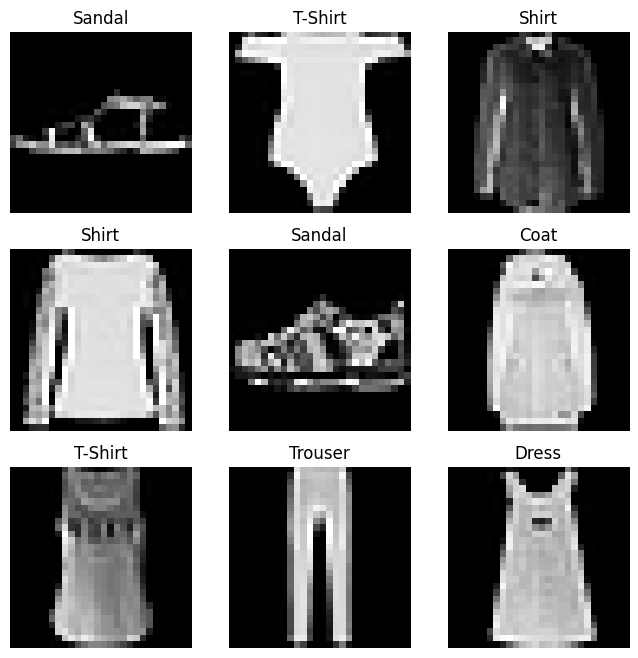

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### What about my own data?

__NOTE__: refer to [this](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files) if you need to load your own data. Note that this assumes your labels are in a csv file in the format of `image_name: label`, and all the corresponding images are in __one__ folder.

__PRO-TIP__: the common way is we store all image in one folder, but create sub-folders for each class. In that case, you do not have the labels file - need to write your own code to derive the labels.

### Preparing your data for training with `DataLoaders`

The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass __multiple__ samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.

In below examples, we load every 64 images as a batch.

__PRO-TIP__:
1. Typically we use the same batch size for training and testing data.
2. batch size is determined by your memory size, or GPU memory. If you get the out-of-memory error, reduce batch size.

In [ ]:
from torch.utils.data import DataLoader

### capitalized variables are global - serve whole notebook
BATCH_SIZE = 64
## TEST_BATCH_SIZE = 1

train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

If you need to iterate through the dataloader (although we don't usually do this):

In [ ]:
for batch_data, batch_label in train_dataloader:
  # print(batch_data, len(batch_data))
  print(batch_label, len(batch_label))
  break

tensor([8, 9, 8, 0, 8, 2, 3, 1, 5, 5, 8, 8, 5, 0, 9, 9, 2, 5, 7, 7, 2, 6, 1, 5,
        6, 5, 6, 3, 7, 8, 1, 0, 1, 2, 1, 6, 8, 4, 4, 2, 0, 1, 3, 5, 1, 8, 3, 7,
        9, 8, 2, 5, 4, 0, 4, 5, 0, 7, 2, 5, 3, 6, 4, 0]) 64


Typically we take one (usually the first) data point from a `dataloader`.

This is used when:
1. We need to do some EDA; or
2. We are tesing the model on one data point.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


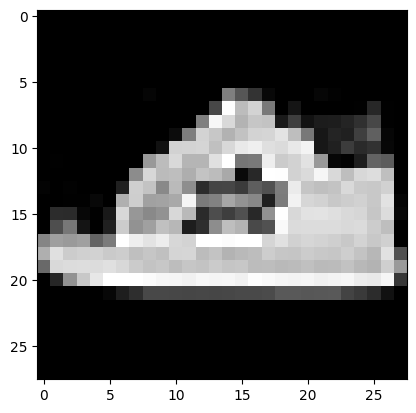

Label: 7


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Answer the following questions:

1. Why `train_features[0]`?
2. Why do we need `squeeze`? What does it do?

Answer:
1. we just want the first image
2. We want to remove the first dimension

__NOTE__: once we load data in as tensors, we can use abovementioned tensor operations of transform it.



---


## Basic Network with `torch`

Unlike `tensorflow`, NNs in `torch` are instances of subclass `nn.Module`. You can think of classes/objects as super variables with its own __functions__ and __methods__.

In a `torch` NN, the two important function are:
1. `__init__`: which initializes the architecture of the NN; and
2. `forward`: which carrys forward propagation (move data through the layers in NN).

In [ ]:
from torch import nn

class linearNN(nn.Module): ##Parent or Super class
    ## model architecture
    def __init__(self): ## init creates the class/object
        super().__init__() ## super refers to the parent/super class in line 5
        self.flatten = nn.Flatten() ## first flatten layer, makes multi dimensional data one dimensional
        ## we have two linear layers here
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), ## part of 1st layer
            nn.ReLU(), ## part of 1st layer
            nn.Linear(512, 512), ## 2nd layer
            nn.ReLU(), ## 2nd layer
            nn.Linear(512, 10), ## 10 output due to 10 classes
        )
    ## forward prop
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        ## pred = nn.Softmax(dim=1)(logits).argmax(1)
        return logits ## to check if something is wrong
        ## return pred #### predicted class

In order to use above NN, you need to assign it to a variable.

__NOTE__: you can also use the `.to()` method to move it to the GPU (`device`).

In [ ]:
model = linearNN().to(device)
print(model) ## this prints the model architecture

linearNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


#### Answer the questions
1. How many layers?
2. Does each layer have an activation function, if so, what are they?

1. 3 layers
2. ReLU

To use the model, we pass it the input data. This executes the model’s forward, along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866). Do not call `model.forward()` directly!

Calling the model on the input returns a 2-dimensional tensor with `dim=0` corresponding to each output of 10 raw predicted values for each class, and `dim=1` corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [ ]:
X = torch.rand(1, 28, 28, device=device) ## random data
logits = model(X)
logits

tensor([[ 0.0475, -0.1213, -0.1402,  0.0498,  0.0773,  0.1418, -0.0136,  0.0036,
         -0.0031,  0.0947]], device='cuda:0', grad_fn=<AddmmBackward0>)

#### Answer the questions
1. Can you explain the shape of the input data?
2. Based on the `logits`, can you tell me which class is predicted?

In [ ]:
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(-1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5], device='cuda:0')


In [ ]:
pred_probab.detach().cpu().numpy().shape

(1, 10)

You can also look at the model paraemters - keep in mind we never trained `model` so the parameters are random!

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: linearNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0060, -0.0164,  0.0101,  ...,  0.0032, -0.0275,  0.0123],
        [-0.0084,  0.0151, -0.0283,  ...,  0.0050,  0.0133, -0.0019]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0317, 0.0019], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0097, -0.0021,  0.0418,  ...,  0.0282,  0.0228, -0.0385],
        [-0.0402,  0.0216,  0.0189,  ..., -0.0191, -0.0387,  0.0152]],
       device='cuda:0', grad_fn=<SliceBack

## Model Training, Eval, and Optimization

We know we need to train the NN so it can be more useful. Similar to `keras` we train model on __epochs__.

In order to do that, we need to define a few more __hyperparameters__:

In [ ]:
LR = 1e-1 ## learning rate, 0.0001
EPOCHS = 10

If you need a refresher:
- __Number of Epochs__: the number times to iterate over the dataset

- __Batch Size__: the number of data samples propagated through the network before the parameters are updated, in this case `64`

- __Learning Rate__: how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.



### Optimization Loop
Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

Each epoch consists of two main parts:
- The Train Loop - iterate over the training dataset and try to converge to optimal parameters.

- The Validation Loop - iterate over the validation dataset to check if model performance is improving. In this case let's just use the test set for demo purposes.

In order to facilitate backpropagation, we need to define a loss function -- keep in mind the training purpose is to __minimize__ loss.

#### Loss Function
When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include [`nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error) for regression tasks, and [`nn.NLLLoss`](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood) for classification. [`nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model’s output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.



In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

#### Optimizer
Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use __Stochastic Gradient Descent__). All optimization logic is encapsulated in the `optimizer` object. Here, we use the SGD optimizer; additionally, there are [many different optimizers](https://pytorch.org/docs/stable/optim.html) available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=LR) ### parameters is the weights to optimize based on the loss and etc.

Inside the training loop, optimization happens in three steps:
1. Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.

2. Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.

3. Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.

Using the above logic, we define `train_loop` that loops over our optimization code, and `test_loop` that evaluates the model’s performance against our test data.

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #### PREPROCESSING NEEDED HERE
        X /= 255
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad(): ### Disable gradients; weights are frozen; No training
        for X, y in dataloader: #### Prevent Leakage; Calculate Loss only
            pred = model(X) #### pred is a tensor of float of gradient from GPU
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to `train_loop` and `test_loop`. Feel free to increase the number of epochs to track the model’s improving performance.

In [ ]:
model = linearNN()
for t in range(EPOCHS):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302428  [   64/60000]
loss: 2.302148  [ 6464/60000]
loss: 2.299504  [12864/60000]
loss: 2.303064  [19264/60000]
loss: 2.305381  [25664/60000]
loss: 2.302389  [32064/60000]
loss: 2.302205  [38464/60000]
loss: 2.304200  [44864/60000]
loss: 2.305101  [51264/60000]
loss: 2.303958  [57664/60000]
Test Error: 
 Accuracy: 8.7%, Avg loss: 2.302441 

Epoch 2
-------------------------------
loss: 2.302015  [   64/60000]
loss: 2.303619  [ 6464/60000]
loss: 2.300392  [12864/60000]
loss: 2.301260  [19264/60000]


KeyboardInterrupt: ignored

### NOTES:
1. Sometimes datasets is something need to pay attention
2. Bad dataset wont improve the performance of the model


## Save & load model

Please refer to [this tutorial](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/11f1adacb7d237f2041ce267ac38abb6/saveloadrun_tutorial.ipynb).

## DO IT YOURSELF

The `model` did not improve in the training process. Can you figure out why and try to make it perform better?